In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.3 MB/s eta 0:00:00


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import fastai

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
ims = search_images_ddg('red panda', max_images = 200)


In [ ]:
ims[1]

NameError: name 'ims' is not defined

In [ ]:
import shutil


folder_path = '/content/cats'

# Delete the folder and all its contents
shutil.rmtree(folder_path)


In [ ]:
from pathlib import Path
path = Path('cats')
if not path.exists():
    path.mkdir()

In [ ]:
wild_cats = [
    "Serval",               # Leptailurus serval
    "Caracal",              # Caracal caracal
    "Ocelot",               # Leopardus pardalis
    "Margay",               # Leopardus wiedii
    "Pallas's Cat",         # Otocolobus manul
    "Sand Cat",             # Felis margarita
    "Bornean Bay Cat ",     # Felis nigripes
    "Asiatic Golden Cat",       # Leopardus geoffroyi
    "Andean Mountain Cat",  # Leopardus jacobita
    "Fishing Cat",          # Prionailurus viverrinus
    "Cheetah",              # Acinonyx jubatus
    "Lynx",                 # Lynx lynx
    "Bobcat",               # Lynx rufus
    "Jungle Cat",           # Felis chaus
    "Leopard Cat",          # Prionailurus bengalensis
    "Lion",                 # Panthera leo
    "Tiger",                # Panthera tigris
    "Leopard",              # Panthera pardus
    "Jaguar",               # Panthera onca
    "Rusty-spotted Cat"     # Prionailurus rubiginosus
]


for i in wild_cats:
    dest = path/i
    dest.mkdir(exist_ok=True)

    results = search_images_ddg(f'real {i} animal image', max_images=200)
    download_images(dest, urls=results)


In [ ]:
fns = get_image_files(path)
fns

(#3744) [Path("cats/Pallas's Cat/e141625b-7751-47ea-9178-3b5d4c0cd4df.jpg"),Path("cats/Pallas's Cat/82311cb2-c7b1-4b8d-aa6e-f9f9b2845526.jpg"),Path("cats/Pallas's Cat/c10f1643-6d1f-4956-b98e-2d03ca5911d7.jpg"),Path("cats/Pallas's Cat/468a005e-67e2-49dc-8354-10ed0896f7cd.jpg"),Path("cats/Pallas's Cat/631a426a-9f4d-4210-96fd-31b9cb445fa1.jpg"),Path("cats/Pallas's Cat/254f32aa-d2c4-4776-91b7-411df2fbc40c.jpg"),Path("cats/Pallas's Cat/02c412e7-4256-4136-8008-3378639adbc8.jpg"),Path("cats/Pallas's Cat/c5c3c2b5-f15f-4c67-94fd-be983386e215.jpg"),Path("cats/Pallas's Cat/720d50d1-d285-4e90-9245-323f9f5b4635.jpg"),Path("cats/Pallas's Cat/e211ad06-1914-4410-a51a-50dbf8828d39.jpg")...]

In [ ]:
failed = verify_images(fns)
failed

(#131) [Path('cats/Tiger/5720057b-351c-4d4e-b271-b644052bd6f3.jpg'),Path('cats/Tiger/b2e33b98-5861-4dd1-8c2e-8a6de0ca03c2.jpg'),Path('cats/Tiger/1fa959ff-1872-4df1-ae3f-15dc246755a9.jpg'),Path('cats/Tiger/50e944c3-0fa6-4237-bfb4-98b23f2eecc5.jpg'),Path('cats/Tiger/d7985603-3a48-47d9-ba50-08582a63228a.jpg'),Path('cats/Tiger/0f09d5de-960a-4b73-b842-3f119b70c5a6.jpg'),Path('cats/Tiger/ac38dd72-db2a-49bb-a9f0-0f0100be846e.jpg'),Path('cats/Tiger/e73b4780-7cc3-48cb-966c-30a3d569b3f6.jpg'),Path('cats/Tiger/ff076c26-8537-47da-9d30-26208636a671.jpg'),Path('cats/Fishing Cat/6455b51f-628b-44b2-ba11-8555e31239ce.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#131) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
from PIL import Image
import os
from pathlib import Path


def convert_to_rgb_and_save(img_path, output_path):
    img = Image.open(img_path)

    # Convert any image to RGB (regardless of its original mode)
    img = img.convert('RGB')

    img.save(output_path)


def preprocess_dataset(input_dir, output_dir):
    input_path = Path(input_dir)
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)

    for subdir in input_path.glob('**/*'):
        if subdir.is_dir():
            relative_subdir = subdir.relative_to(input_path)
            new_output_dir = output_path / relative_subdir
            new_output_dir.mkdir(parents=True, exist_ok=True)
        else:

            if subdir.suffix.lower() in ['.png', '.jpg', '.jpeg']:  # Adjust file extensions as needed
                output_file = output_path / subdir.relative_to(input_path)
                convert_to_rgb_and_save(subdir, output_file)


preprocess_dataset('cats', 'new_cats')



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


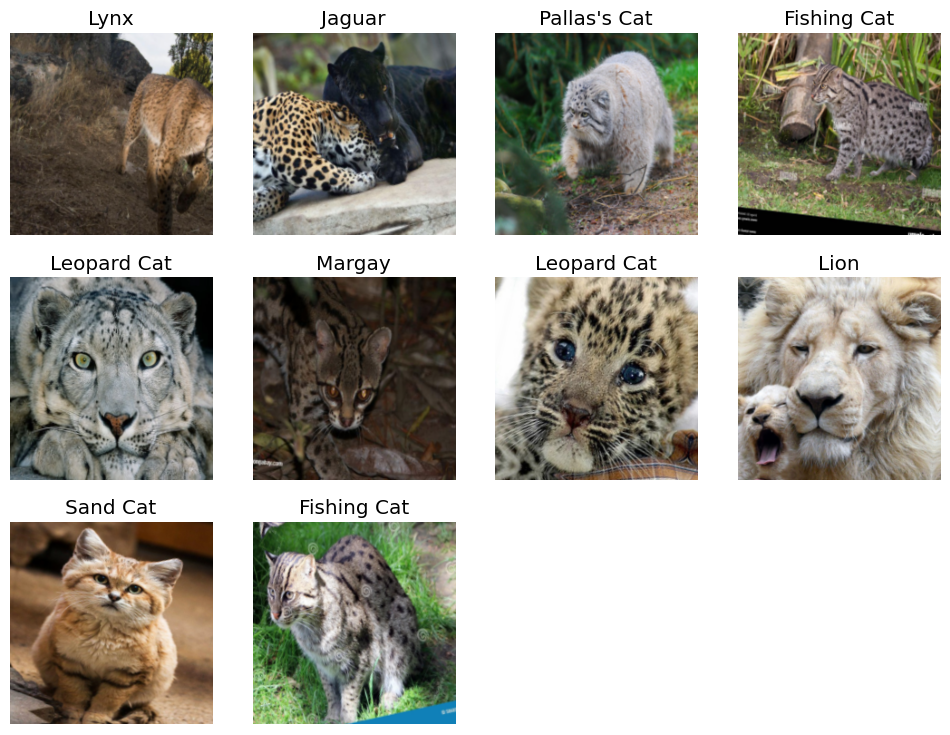

In [ ]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.95),
    batch_tfms=aug_transforms(do_flip=True, flip_vert=False, max_rotate=15, max_zoom=1.1, max_lighting=0.1, max_warp=0.05)
path = Path('new_cats')
dls = cats.dataloaders(path)
dls.train.show_batch(max_n = 10)

In [ ]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

# Using the new 'weights' argument
#model = efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)



In [ ]:
learn = vision_learner(dls, efficientnet_b0, metrics=error_rate,
                       pretrained=True, weights=EfficientNet_B0_Weights.DEFAULT)

learn = learn.to_fp16()

#learn.lr_find()

In [ ]:
import os

folder_path = 'new_cats/Asiatic Golden Cat'

# Count the number of files in the folder
num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in '{folder_path}': {num_files}")

Number of files in 'new_cats/Asiatic Golden Cat': 178


In [ ]:
learn.fine_tune(epochs=20, base_lr=0.001737800776027143, wd = 0.3)

KeyboardInterrupt: 

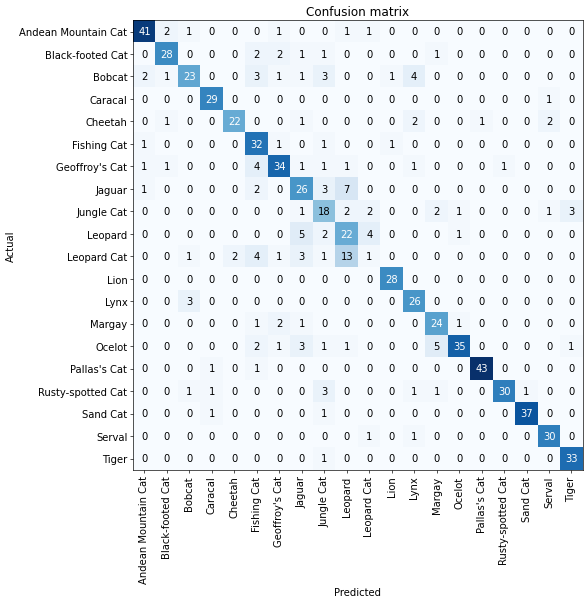

In [ ]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

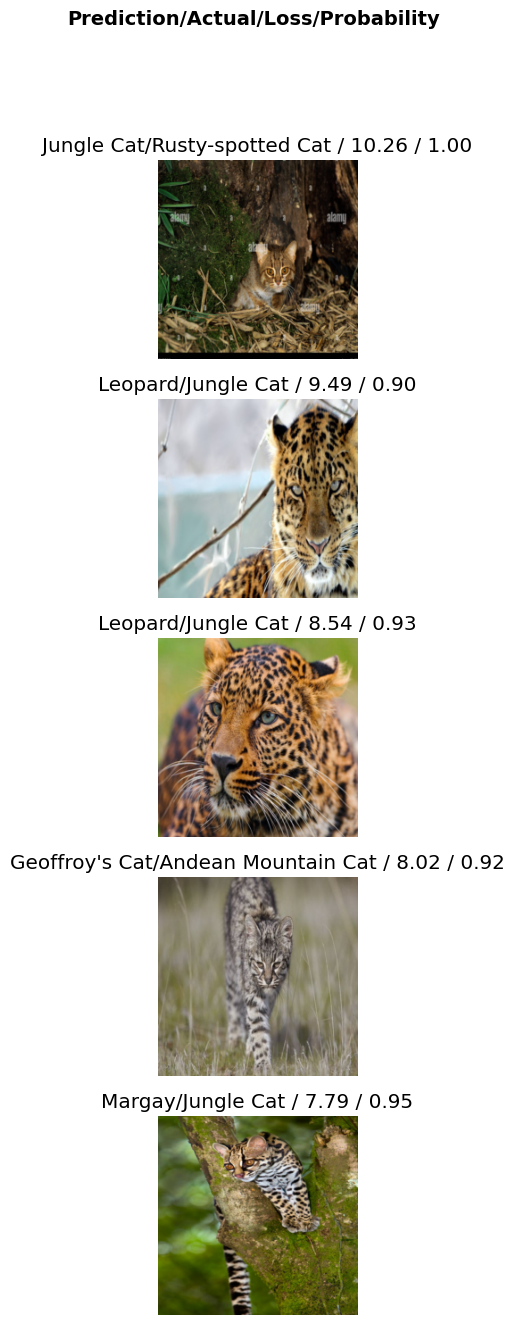

In [ ]:
interp.plot_top_losses(5, nrows =5)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: [Errno 2] No such file or directory: 'cats/jaguar/cad60ca0-907b-438b-a3f6-4e7b37f46325.jpg'

In [ ]:
!ls models/

In [ ]:
# Save the model as a pickle file
learn.export('best_model_20_cats.pkl')
